# Fundamentals

 ## Introduction

Consider the problem of finding all real roots of a polynomial as
$$p(x) = x^4 - 3 x^3 - 21 x^2 + 43 x + 60$$
This is a fundamental problem in mathematics, and has been studied since the third millenium B.C. <cite data-cite="336701/MIW42KL9"></cite>. 

As <cite data-cite="336701/XFQXXT7W"></cite> says, "The first, and in many cases the most expensive, step in most methods for computing the real roots of a polynomial is to isolate them. That is, to compute a set of disjoint
intervals containing them (exactly one root on each interval and all roots contained in disjoint intervals)".  After root isolation, any bracketing method<cite data-cite="336701/XGYD5TB9"></cite> can be applied to aproximate the roots with arbitrary precision. Descartes (1637), Lagrange(1798), Budan (1800), Fourier (1820), Sturm (1829) gave important contributions to the area. Even with such heavy weight precursors, polynomial real root isolation is, until today, an active area of research, and very efficient methods have been proposed (see, for instance, <cite data-cite="336701/I4VDBIQD"></cite>).

Here we propose a new method which is much simpler than all algorithms we have seen. The central idea is to  define isolating intervals from the roots of the derivative of the polynomial. Roots of the derivative are found applying recursively the algorithm; recursion finishes when we arrive at a first degree polynomial. A pseudo code for the main function of the algorithm is as simple as this:

```python
# pseudo code
def find_real_roots(p):
    if degree(p) == 1:
        return "-b/a" # for a first degree polynomial written as p(x) = ax + b
    else:
        return roots_from_derivative_roots(find_real_roots(p.diff()))
        # p.diff() is the derivative of polynomial p
```

Remark the recursive call on this function. Root isolation is done by function roots_from_derivative_roots.



## Root isolation
Root isolation from roots of derivative is based on the following theorem, which is a direct application of the Mean Value Theorem<cite data-cite="336701/KP26TM8C"></cite>:


> If $r$ and $s$, $r < s$, are real roots of a polynomial $p$, there exists at least one point $v$, $r < v < s$ such that $p'(v) = 0$


If $p'$ has at least one root, let $v_0 < v_1 < \ldots < v_d$ where $d \geq 0$ denote all $d+1$ distinct real roots of $p'$. The algorithm considers the following intervals, which are disjoint and cover the hole real line. For each of these intervals  with simple tests we can decide if the interval contains zero or one root of the polynomial. None of these intervals can contain more than one root.

Case I. Interval $(-\infty, v_0]$. Here, 

- if $p(v_0) = 0$: the interval contains one root, $v_0$

- if $p(-\infty)$ and $p(v_0)$ have equal signs,  we have no roots

- if $p(-\infty)$ and $p(v_0)$ have opposite signs,  we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x < v_0$ such that $p(x)$ and $p(v_0)$ have opposite signs

Case II. Interval $(v_i, v_{i+1}]$ for $0 \leq i < d$. In those intervals,
- if $p(v_i) = 0$, we have no roots (since $v_i$ do not belong to this interval)
- if $p(v_{i+1}) = 0$, $v_{i+1}$ is the only root
- if $p(v_i)$ and $p(v_{i+1})$ have equal signs, we have no roots
- if $p(v_i)$ and $p(v_{i+1})$ have opposite signs, we have exactly one root. A bracketing algorithm may be directly applied.

Case III. Interval $(v_d, \infty)$. Here,
- if $p(v_d) = 0$, we have no roots (since $v_d$ do not belong to this interval)
- if $p(v_d)$ and $p(\infty)$ have equal signs, we have no roots
- if $p(v_d)$ and $p(\infty)$ have opposite signs, we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x > v_d$ such that $p(x)$ and $p(v_d)$ have opposite signs.

If derivative $p'$ has no roots, we shall consider the following disjoint intervals. We take 0 as a reference, but any other point would do. 

Case IV. Interval $(-\infty, 0]$. Here, 
- if $p(0) = 0$,  $0$ is the only root
- if $p(-\infty)$ and $p(0)$ have equal signs,  we have no roots
- if $p(-\infty)$ and $p(0)$ have opposite signs,  we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x < 0$ such that $p(x)$ and $p(0)$ have opposite signs
    
Case V. Interval  $(0, \infty)$. Here,
- if $p(0) = 0$, we have no roots (since $0$ do not belong to this interval)
- if $p(0)$ and $p(\infty)$ have equal signs, we have no roots
- if $p(0)$ and $p(\infty)$ have opposite signs, we have exactly one root. In order to apply a bracketing algorithm, we need to find a point $x > 0$ such that $p(x)$ and $p(0)$ have opposite signs.
    
The algorithm we propose deals with each of these cases. When it is known that an interval like $(-\infty, v_0]$ contains a root $r < v_0$, the algorithm will look for a point $x$ such that $p(x)$ and $p(v_0)$ have opposite signs, walking towards $-\infty$ with increasingly larger steps. Similar actions are taken in order to deal with all other infinite intervals.



### Examples
In all examples bellow, $v_0$ is the smallest root of derivative, $v_1$ the second smallest root of derivative, and so on. 

In [4]:
%matplotlib inline

import mpmath
from mpmath import mp, mpf, nstr, findroot
import matplotlib.pyplot as plt

import numpy as np
from sympy import init_session
    # We use sympy just to facilitate the construction of examples and to pretty print polynomials
init_session()

IPython console for SymPy 1.9 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [5]:
def plot_p(p, xlim):
    """
    Plots a polynomial
    """
    v = np.linspace(xlim[0], xlim[1], 200)
    #print(f'v = {v}')
    func_p = lambdify(x, p, 'numpy')
    
    ax = plt.gca()
    y_p = func_p(v)
    plt.gcf().text(0.02, -0.1, '$' + latex(p) + '$', fontsize=11)
    

    ax.plot(v, y_p, 'b')

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    plt.show()

In [6]:
def plot_p_pdiff(p, xlim, textstr=""):
    """
    Plots a polynomial and its derivative
    """
    v = np.linspace(xlim[0], xlim[1], 200)
    #print(f'v = {v}')
    func_p = lambdify(x, p, 'numpy')
    pdiff = p.diff()
    func_pdiff = lambdify(x, pdiff, 'numpy')
    
    ax = plt.gca()
    y_p = func_p(v)
    plt.gcf().text(0.02, -0.25, textstr, fontsize=11)
    
    y_pdiff = func_pdiff(v)
    ax.plot(v, y_p, 'b', label='$' + latex(p) + '$')
    ax.plot(v, y_pdiff, 'r', label='$' + latex(pdiff) + '$')
    ax.legend()
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    plt.show()

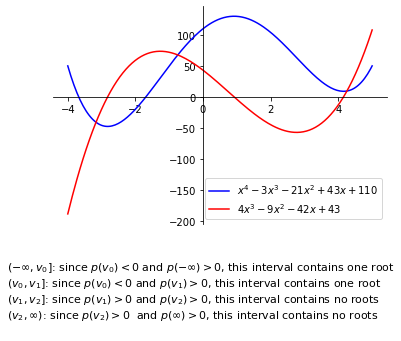

In [7]:
%matplotlib inline

textstr = '''
$(-\infty, v_0]$: since $p(v_0) < 0$ and $p(-\infty) > 0$, this interval contains one root
$(v_0, v_1]$: since $p(v_0) < 0$ and $p(v_1) > 0$, this interval contains one root
$(v_1, v_2]$: since $p(v_1) > 0$ and $p(v_2)  > 0$, this interval contains no roots
$(v_2, \infty)$: since $p(v_2) > 0$  and $p(\infty) > 0$, this interval contains no roots
'''

p = ((x + 4)*(x + 1)*(x - 3)*(x - 5) + 50).expand()
p_diff = p.diff()

plot_p_pdiff(p, (-4, 5), textstr)

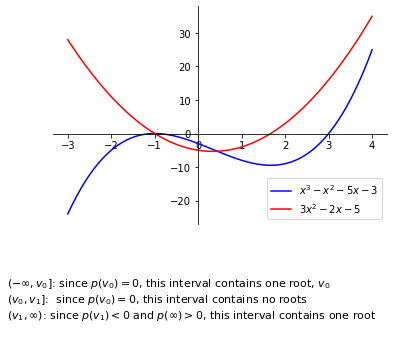

In [8]:
%matplotlib inline

p = ((x + 1)**2 * (x - 3)).expand()
p_diff = p.diff()

textstr = '''
$(-\infty, v_0]$: since $p(v_0) = 0$, this interval contains one root, $v_0$
$(v_0, v_1]$:  since $p(v_0) = 0$, this interval contains no roots
$(v_1, \infty)$: since $p(v_1) < 0$ and $p(\infty) > 0$, this interval contains one root
'''

plot_p_pdiff(p, (-3,4), textstr)

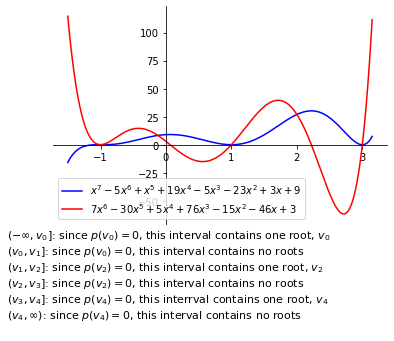

In [9]:
%matplotlib inline

textstr = '''
$(-\infty, v_0]$: since $p(v_0) = 0$, this interval contains one root, $v_0$
$(v_0, v_1]$: since $p(v_0) = 0$, this interval contains no roots
$(v_1, v_2]$: since $p(v_2) = 0$, this interval contains one root, $v_2$
$(v_2, v_3]$: since $p(v_2) = 0$, this interval contains no roots
$(v_3, v_4]$: since $p(v_4) = 0$, this interrval contains one root, $v_4$
$(v_4, \infty)$: since $p(v_4) = 0$, this interval contains no roots
'''

p = ((x+1)**3 * (x - 1)**2 * (x - 3)**2).expand()
p_diff = p.diff()

plot_p_pdiff(p, (-1.5, 3.15), textstr)

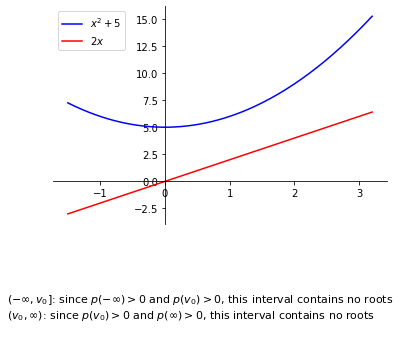

In [10]:
textstr = '''
$(-\infty, v_0]$: since $p(-\infty) > 0$ and $p(v_0) > 0$, this interval contains no roots
$(v_0, \infty)$: since $p(v_0) > 0$ and $p(\infty) > 0$, this interval contains no roots
'''
p = (x**2 + 5).expand()
pdiff = p.diff()

plot_p_pdiff(p, [-1.5, 3.2], textstr)

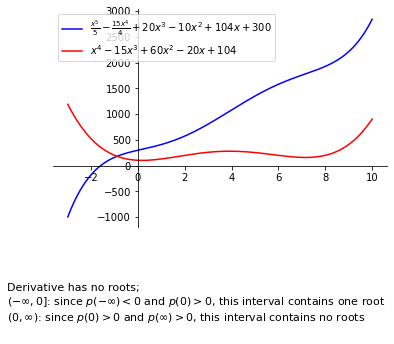

In [11]:
textstr = '''
Derivative has no roots;
$(-\infty, 0]$: since $p(-\infty) < 0$ and $p(0) > 0$, this interval contains one root
$(0, \infty)$: since $p(0) > 0$ and $p(\infty) > 0$, this interval contains no roots
'''

p_diff = ((x + 4)*(x + 1)*(x - 3)*(x - 5) + 200).expand().subs(x, x-3)
p = integrate(p_diff, x) + 300

plot_p_pdiff(p, (-3, 10), textstr)

<div class="cite2c-biblio"></div>